# 最小二乘法拟合
最小二乘法是一种数学优化技术，它通过最小化误差的平方和寻找数据的最佳函数匹配。  
拟合关注的是目前的数据，尽量使已知的数据减少误差（拟合参差）。  
而回归还要考虑的输入输出具有噪声，同时关注未来的数据，要使现在和未来可能出现的数据误差尽量小。

### 曲线拟合
使用sicpy的leastsq()函数进行曲线拟合
- scipy.optimization 子模块提供了函数最小值(标量或多维)、曲线拟合和寻找等式的根的有用算法。在optimize模块中可以使用 leastsq() 对数据进行最小二乘拟合计算。  
- leastsq() 函数传入误差计算函数和初始值，该初始值将作为误差计算函数的第一个参数传入。计算的结果是一个包含两个元素的元组，第一个元素是一个数组，表示拟合后的参数；第二个元素如果等于1、2、3、4中的其中一个整数，则拟合成功，否则将会返回 mesg。

In [1]:
# 倒入模块
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [2]:
# 原函数
def Fun(p, x):
    a1, a2, a3 = p
    return a1*x**2 + a2*x + a3

# 参差
def error(p, x, y):
    return Fun(p, x) - y

In [3]:
# 原始参数
p_value = [-2, 5, 10]
x = np.linspace(-10, 10, 100)

# 加上随机噪声
noise = np.random.randn(len(x)) # 产生一些0.几的小数
y = Fun(p_value, x) + noise*2

# 拟合的初始参数设置
p0 = [0.1,-0.01,100] 

In [4]:
# 进行拟合
para = leastsq(error, p0, args=(x, y))

# para[0]为拟合后的参数，y_fitted为拟合得到的函数
y_fitted = Fun(para[0], x)

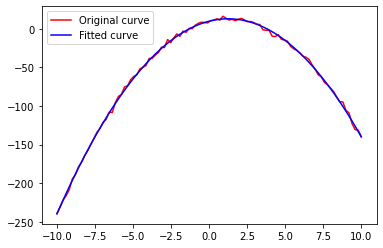

拟合得到的参数: [-1.99853916  4.99598738  9.97642102]


In [5]:
plt.figure
plt.plot(x,y,'r', label = 'Original curve')
plt.plot(x,y_fitted,'-b', label ='Fitted curve')
plt.legend()
plt.show()
print('拟合得到的参数:', para[0])

## 线性拟合
使用Numpy的linalg.lstsq函数进行线性拟合
<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
通过一些噪声数据点拟合如下线性的函数$$y = mx + c$$
将数据构造成如下矩阵，其中m和c为系数
$$
\begin{vmatrix}
x_{1} & 1\\
x_{2} & 1\\
x_{3} & 1\\
x_{4} & 1\\
\end{vmatrix}
*
\begin{vmatrix}
m \\
c \\
\end{vmatrix}
=
\begin{vmatrix}
y_{1} \\
y_{2} \\
y_{3} \\
y_{4} \\
\end{vmatrix}
$$
将上矩阵简化为
$$\begin{vmatrix}a\end{vmatrix} * \begin{vmatrix}p\end{vmatrix} = \begin{vmatrix}b\end{vmatrix}$$
其中a为第一个参数，b为第二个参数，p为拟合后的第一个返回值
即np.linalg.lstsq(a, b, rcond=None)

In [6]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

In [7]:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [8]:
# 进行拟合
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

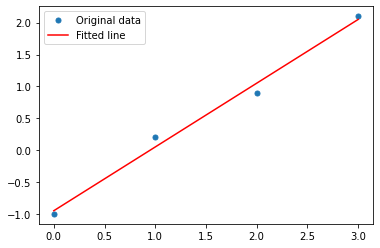

In [10]:
_ = plt.plot(x, y, 'o', label='Original data', markersize=5)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()